In [1]:
%cd notebooks
%cd ..

[Errno 2] No such file or directory: 'notebooks'
/home/ira/code/projects/predictive-learners/notebooks
/home/ira/code/projects/predictive-learners


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# exp_dir = "../predictive-learners/exp/games-recurrent1frame-images/"
exp_dir = "clean_experiments/car-video/"
# exp_dir = "exp/car-video/"

# exp_dir = "clean_experiments/reacher-rnn/"
# envs = ( "PixelCopter-ple-v0",)
# envs = ( "PixelCopter-ple-v0",  "Pong-ple-v0", "Catcher-ple-v0",)
# envs = ( "PixelCopter-ple-v0", "Catcher-ple-v0" )
# envs = "Pong-ple-v0",
envs = "CarRacing-v0",
# envs = "CartPole-v0",


# exp_dir = "../predictive-learners/exp/reacher-rnn-1/"
# envs = ( "ball_in_cup-catch", )



# envs = ( "finger-spin", )
# envs = ( "reacher-easy", )
# envs = ( "PixelCopter-ple-v0", )

RUNS = 1
env = envs[0]
VARS = ("test", "base")
# VARS = ("detail", "nodetail")
envs_results = {env: {var : [] for var in VARS} for env in envs}
for env in envs:
    for i in range(1, RUNS+1):
        for var in VARS:
            envs_results[env][var].append(pd.read_csv(
                    "{}/{}-{}_{}.csv".format(exp_dir, env, var, i)
                    ).set_index('updates'))

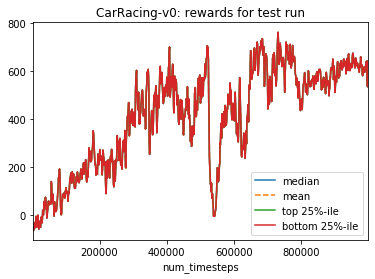

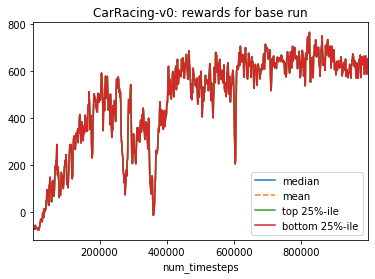

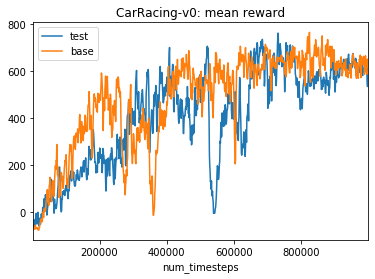

In [11]:
gr = {}
for env in envs:
    for trial in VARS:
        plt.figure()
        gr[trial] = pd.concat(envs_results[env][trial]).groupby('num_timesteps')
        gr[trial].mean_reward.median().plot()
        gr[trial].mean_reward.mean().plot(style='--')
        gr[trial].mean_reward.quantile(0.75).plot()
        gr[trial].mean_reward.quantile(0.25).plot()
        plt.legend([
            'median',
            'mean',
            'top 25%-ile',
            'bottom 25%-ile'
        ])  
        plt.title("{}: rewards for {} run".format(env, trial))
    
    plt.figure()
    for var in VARS:
        gr[var].mean_reward.mean().plot()
    plt.legend(VARS)
    plt.title("{}: mean reward".format(env))